In [ ]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("/home/pafakanov/data/hep_data/particles.pkl")

# Detectors

In [3]:
colors = ['black', 'dimgray', 'lightcoral', 'maroon',
          'orangered', 'chocolate', 'tan', 'orange',
          'olive', 'yellow', 'chartreuse', 'forestgreen',
          'turquoise', 'deepskyblue', 'navy', 'mediumpurple',
          'fuchsia', 'pink']

9it [00:04,  1.83it/s]


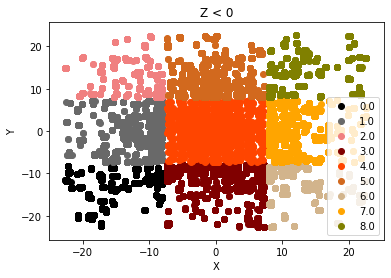

In [4]:
SAMPLES_PER_DETECTOR = 10000
negative_df = df[df['z'] < 0]

detectors = set(sorted(negative_df['detector'].unique()))


plt.title("Z < 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = negative_df[negative_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

9it [00:02,  4.43it/s]


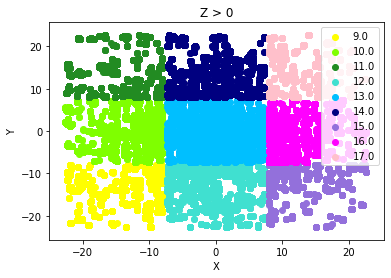

In [5]:
SAMPLES_PER_DETECTOR = 10000
positive_df = df[df['z'] > 0]

detectors = set(sorted(positive_df['detector'].unique()))

plt.title("Z > 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = positive_df[positive_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i + len(detectors)])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

# Energy

In [7]:
def get_detector_df(df_full, detector: int, event: int = -1):
    if event == -1:
        df = df_full[df_full['detector'] == detector].sort_values(by=['timestamp'])
    else:
        df = df_full[(df_full['detector'] == detector) & (df_full['event'] == event)]
    df.sort_values(by=['timestamp'], inplace=True)

    return df

In [8]:
detectors = sorted(df['detector'].unique())
events_num = {detector: None for detector in detectors}
data_size = {detector: None for detector in detectors}


for detector in detectors:
    detector_df = get_detector_df(df, detector=detector)
    data_size[detector] = len(detector_df)
    event_num = detector_df['event'].nunique()
    events_num[detector] = event_num
    print("Detector: {}, events number: {}".format(int(detector), event_num))

Detector: 0, events number: 19
Detector: 1, events number: 23
Detector: 2, events number: 20
Detector: 3, events number: 22
Detector: 4, events number: 23
Detector: 5, events number: 22
Detector: 6, events number: 20
Detector: 7, events number: 21
Detector: 8, events number: 20
Detector: 9, events number: 23
Detector: 10, events number: 24
Detector: 11, events number: 23
Detector: 12, events number: 23
Detector: 13, events number: 25
Detector: 14, events number: 24
Detector: 15, events number: 23
Detector: 16, events number: 24
Detector: 17, events number: 23


In [36]:
sizes = list(data_size.values())
neg_sizes = np.array(sizes[:len(sizes)//2])
pos_sizes = np.array(sizes[len(sizes)//2:])

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_detectors_colormap(sizes, title):
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    plt.title(title)

    Z = np.array(sizes).reshape((3, 3))
    im = ax.imshow(np.log(Z), cmap='spring', aspect='auto') #interpolation='bilinear',

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar = plt.colorbar(im, cax=cax)
    plt.show()